In [19]:
(17744 * 0.75)*2/3 # Целевая группа которые получили рассылку

8872.0

In [20]:
1/6 * 17744 # Контрольная группа 

2957.333333333333

In [572]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [407]:
df = pd.read_excel('Тестовое задание улыбка радуги.xlsx', sheet_name= 'Данные для очистки')
df.rename(columns={
    'Дата': 'date', 
    "Продажи в штуках": 'sales'
}, inplace = True)

In [408]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [409]:
df['year'].unique()

array([2020, 2021, 2022], dtype=int64)

In [410]:
holiday = holidays.CountryHoliday('RU', years=[2020, 2021, 2022])

In [411]:
holiday = pd.Series(holiday.keys()).astype('datetime64')

In [412]:
df['holiday'] = pd.Series(df['date']).apply(lambda x: holidays.CountryHoliday('RU', years=[2020, 2021, 2022]).get(x)).values
df['holiday'] = df['holiday'].astype(bool).astype(int)

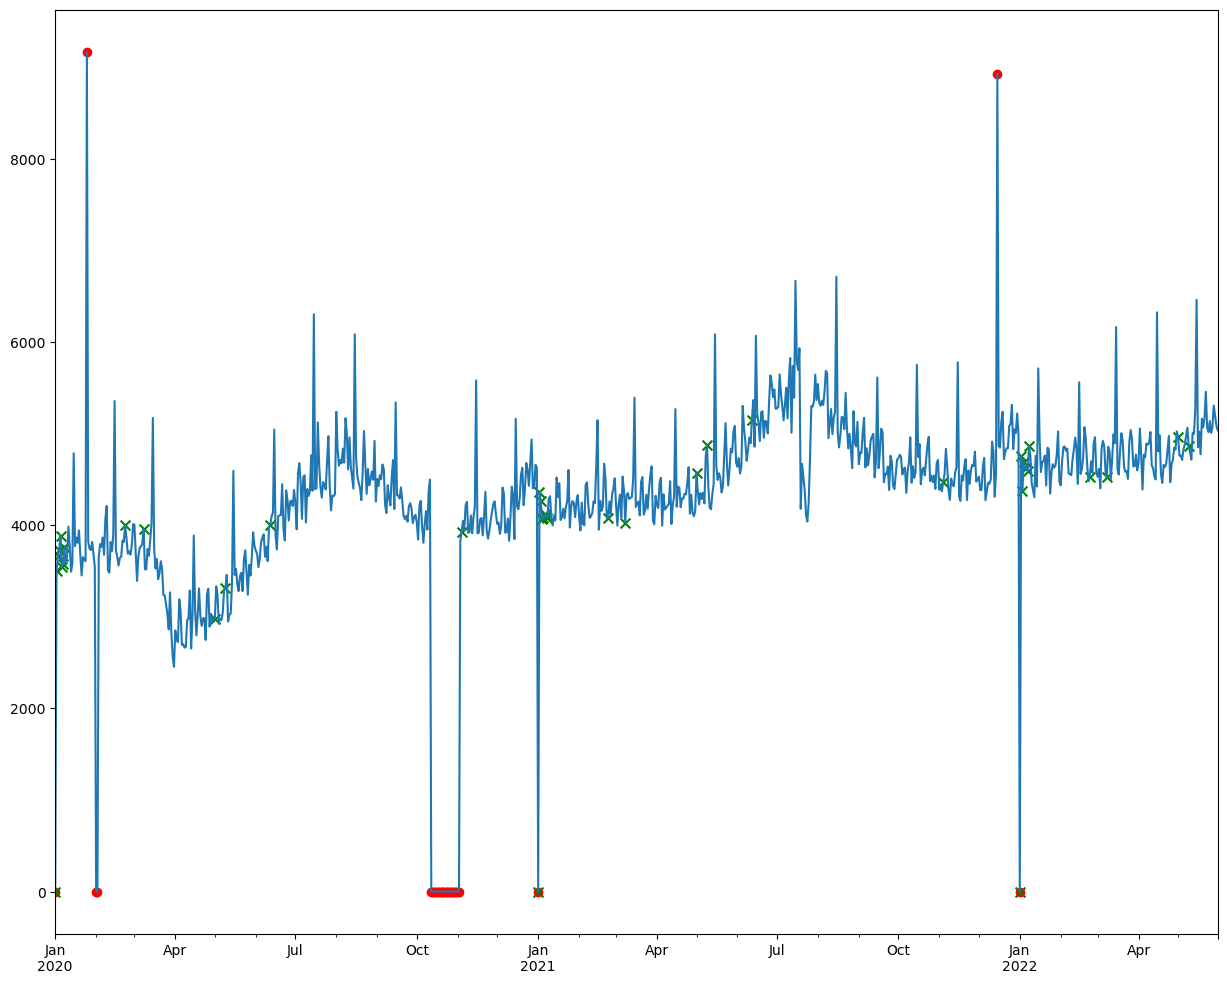

In [413]:
plt.figure(figsize=(15,12))
df.groupby('date')['sales'].sum().plot()
plt.scatter(df[df['sales']==0]['date'], df[df['sales']==0]['sales'], color = 'red')
plt.scatter(df[df['sales']>8000]['date'], df[df['sales']>8000]['sales'], color = 'red')
plt.scatter(df[df['holiday']==1]['date'], df[df['holiday']==1]['sales'], color = 'green', s = 50, marker= 'x')
plt.xlabel(' ')

plt.show()            # Красным отмечены точки очевидных выбросов
                      # Зеленым праздничные дни

In [414]:
print('Средние продажи: %.0f | Стандартное отклонение: %.0f' %(df['sales'].mean(), df['sales'].std()))

Средние продажи: 4287 | Стандартное отклонение: 1006


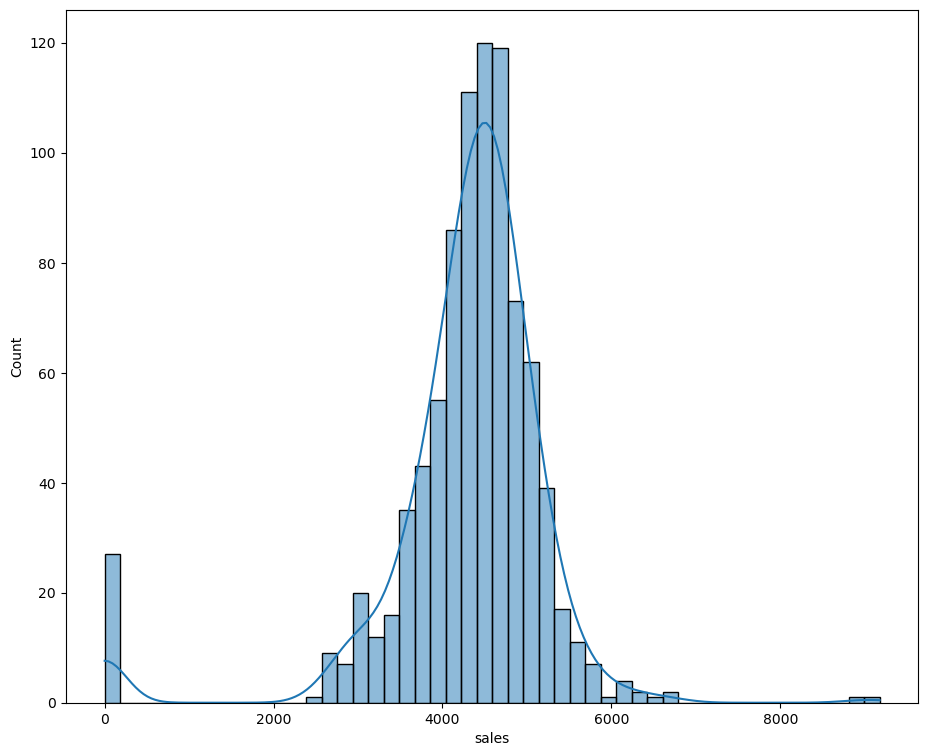

In [415]:
plt.figure(figsize = (11,9))
sns.histplot(df, x = 'sales', bins = 50, kde = True)
plt.show()

In [416]:
df[df['sales']==0].style.background_gradient('Dark2_r')

,date,sales,day,month,year,holiday
0,2020-01-01 00:00:00,0,1,1,2020,1
31,2020-02-01 00:00:00,0,1,2,2020,0
32,2020-02-02 00:00:00,0,2,2,2020,0
285,2020-10-12 00:00:00,0,12,10,2020,0
286,2020-10-13 00:00:00,0,13,10,2020,0
287,2020-10-14 00:00:00,0,14,10,2020,0
288,2020-10-15 00:00:00,0,15,10,2020,0
289,2020-10-16 00:00:00,0,16,10,2020,0
290,2020-10-17 00:00:00,0,17,10,2020,0
291,2020-10-18 00:00:00,0,18,10,2020,0


Из-за коронавируса в 2020 году много дней без продаж, магазины не работали. заменю их медианой за 20 год, если бы магазин функционировал

In [417]:
df[df['year']==2020]['sales'].median()

3918.0

In [419]:
df.loc[(df['sales']==0)&(df['year']==2020)&(df['holiday']==0),'sales'] = \
df[df['year']==2020]['sales'].median()           # Заменил все нерабочие из-за болезни дни медианой за 2020 год

In [434]:
df.drop(index=df[df['sales']==0].index, inplace = True) # Выходные дни просто удалил

In [515]:
df.drop(df.loc[df['sales']>8000].index, inplace = True)

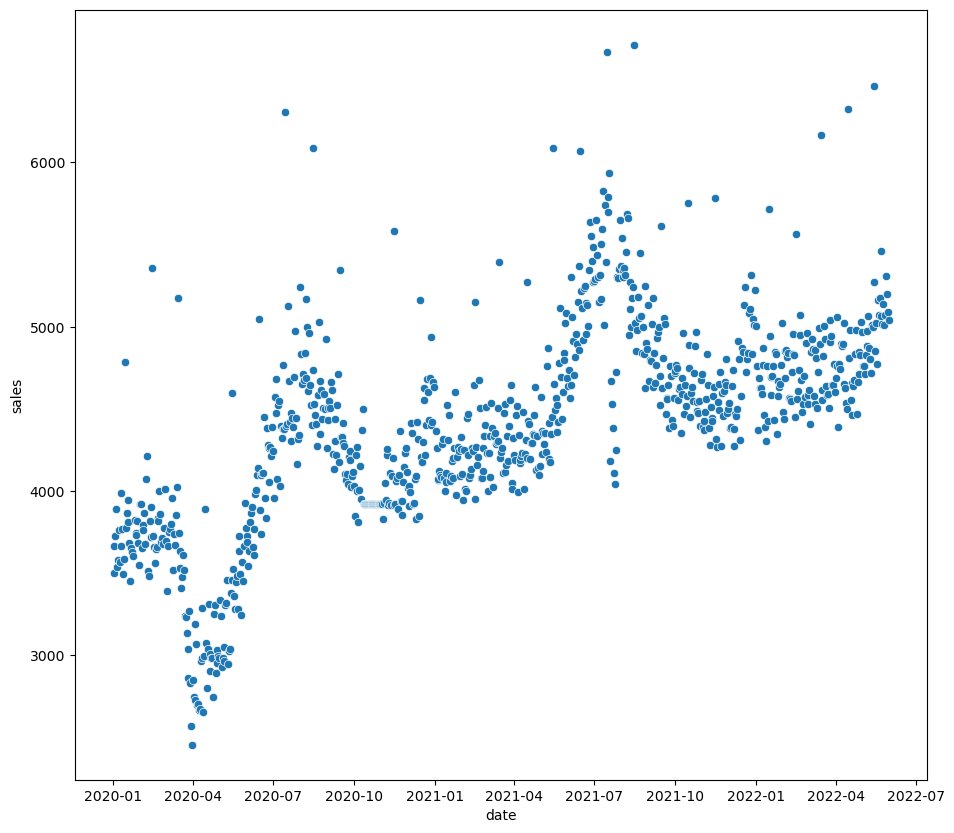

In [516]:
plt.figure(figsize=(11,10))
sns.scatterplot(df, x = 'date', y = 'sales')
plt.show()

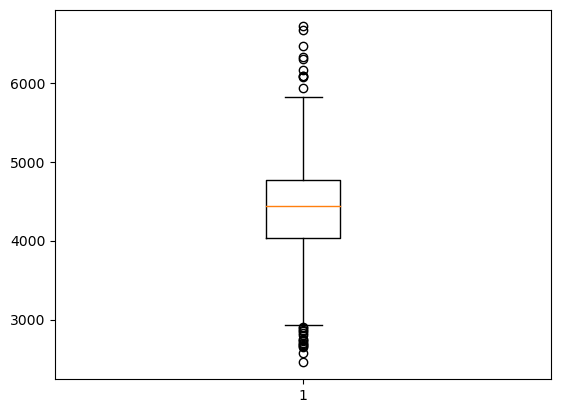

In [517]:
plt.boxplot(df['sales'])
plt.show()

_Бокс показывает, что все значения выше 6000, являются выбросами_

In [524]:
pd.pivot_table(df,values='sales', columns='year', index = 'month').style.background_gradient('Dark2')

year,2020,2021,2022
month,,,
1,3734.103448,4201.633333,4676.833333
2,3838.068966,4271.857143,4745.000000
3,3519.064516,4318.709677,4775.580645
4,2978.766667,4309.533333,4796.500000
5,3382.354839,4605.935484,5050.000000
6,4016.600000,5111.900000,nan
7,4500.870968,5213.322581,nan
8,4706.548387,5204.806452,nan
9,4338.800000,4759.266667,nan


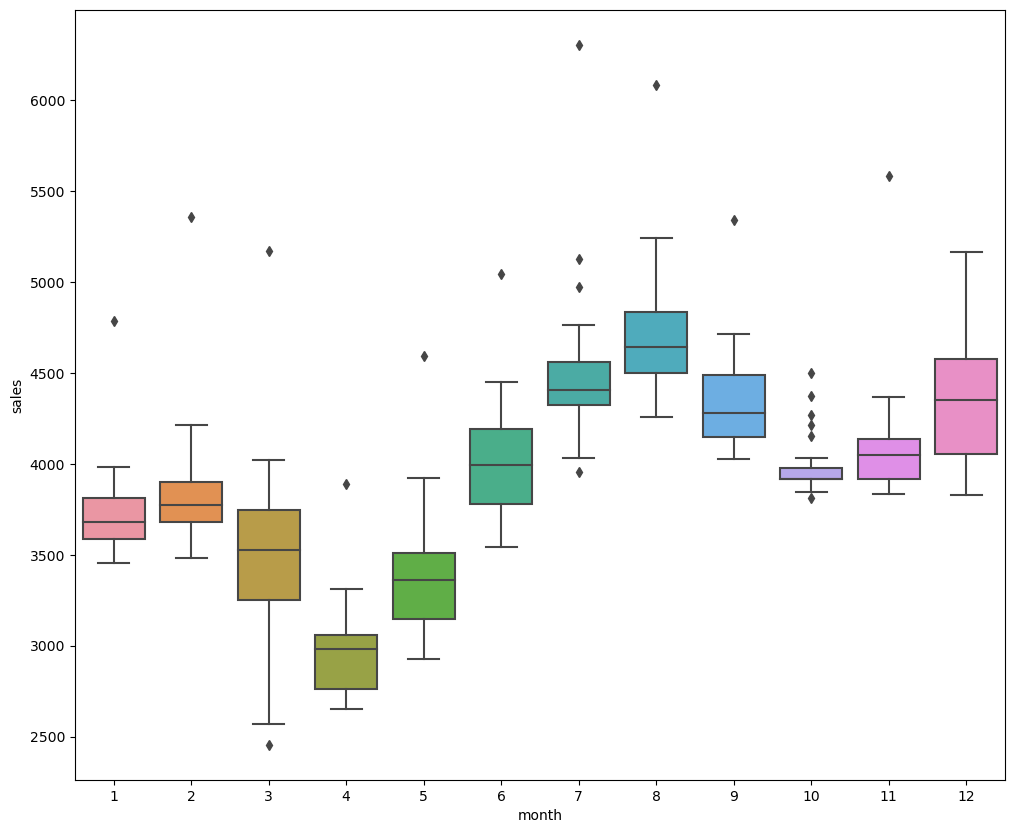

In [571]:
plt.figure(figsize = (12,10))
sns.boxplot(x = df[df['year']==2020]['month'] , y = df[df['year']==2020]['sales'])
plt.show()

In [584]:
df['zscore'].describe()

count    8.770000e+02
mean     3.240788e-16
std      1.000571e+00
min     -3.109281e+00
25%     -5.884207e-01
50%      6.140111e-02
75%      5.975841e-01
max      3.712247e+00
Name: zscore, dtype: float64

In [585]:
df[df['zscore']<-3]

,date,sales,day,month,year,holiday,zscort,zscore
90,2020-03-31,2455,31,3,2020,0,-3.109281,-3.109281
